In [1]:
# Imports
import matplotlib.pyplot as plt
import json

In [2]:
# Load data from result files
results_file = './results/results_5.json'
summary_file = './results/summary.json'

results = json.load(open(results_file))['results']
summary = json.load(open(summary_file))


def autolabel(rects, label_pos=0):
    """
    Generate labels to show values on top of bar charts
    
    :param rects: <pyplot.object> The current pyplot figure
    :param label_pos: <float> OR <int> The amount of offset compared to the height of the bar
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height + label_pos, f'{int(height)}', ha='center', va='bottom')

total: 68
catogorized: 29
uncategorized: 39



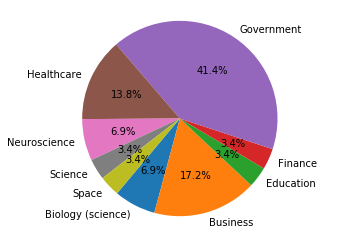

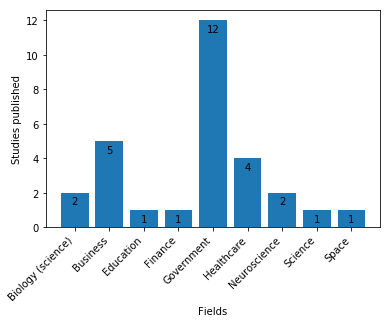

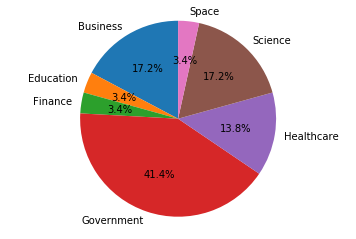

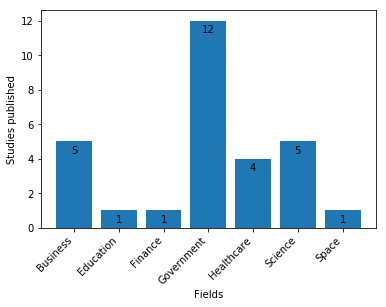

In [3]:
# Visualization for number of articles per category
categories = summary['occurrences per category']
total_results = sum(categories.values())

categories.pop('Generic', None)
categories.pop('Not about data ecosystems', None)
categories.pop('Systematic Review', None)

total_categorized_results = sum(categories.values())
total_uncategorized_results = total_results - total_categorized_results

print(f'total: {total_results}\n' \
      f'catogorized: {total_categorized_results}\n' \
      f'uncategorized: {total_uncategorized_results}\n')

labels = list(categories.keys())
values = list(categories.values())

# Pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=230)
plt.axis('equal')
plt.show()

# Same data in bar chart form
fig = plt.bar(range(len(categories)), values, align='center')
autolabel(fig, -0.8)
plt.xticks(range(len(categories)), labels, rotation=45, ha='right')
plt.xlabel('Fields')
plt.ylabel('Studies published')
plt.show()

# Same charts but this time with the science fields combined
categories_combined = categories
categories_combined['Science'] += categories_combined.pop('Biology (science)')
categories_combined['Science'] += categories_combined.pop('Neuroscience')

labels_combined = list(categories_combined.keys())
values_combined = list(categories_combined.values())

plt.pie(values_combined, labels=labels_combined, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

# Bar chart with science fields combined
fig = plt.bar(range(len(categories_combined)), values_combined, align='center')
autolabel(fig, -0.8)
plt.xticks(range(len(categories_combined)), labels_combined, rotation=45, ha='right')
plt.xlabel('Fields')
plt.ylabel('Studies published')
plt.show()

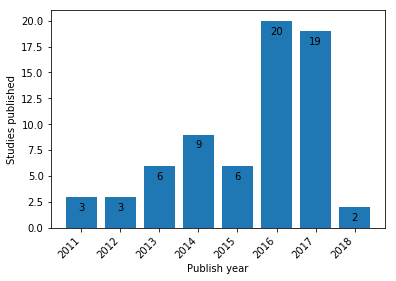

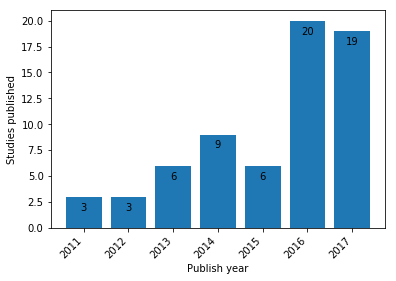

In [6]:
# Visualization of the number of articles published per year
publish_years = {}
for result in results:
    year = result['publish_date'][0:4]
    if year in publish_years.keys():
        publish_years[year] += 1
    else:
        publish_years.update({year: 1})
        
key_list = sorted(list(publish_years.keys()))
value_list = [publish_years[x] for x in key_list]

# It shows a drop in 2018 because the year has just started, this gives
# a wrong idea of the number of studies about the subject
fig = plt.bar(range(len(value_list)), value_list, align='center')
autolabel(fig, -1.5)
plt.xticks(range(len(key_list)), key_list, rotation=45, ha='right')
plt.xlabel('Publish year')
plt.ylabel('Studies published')
plt.show()

# Plot with 2018 removed from the results
key_list = key_list[:-1]
value_list = value_list[:-1]

fig = plt.bar(range(len(value_list)), value_list, align='center')
autolabel(fig, -1.5)
plt.xticks(range(len(key_list)), key_list, rotation=45, ha='right')
plt.xlabel('Publish year')
plt.ylabel('Studies published')
plt.show()

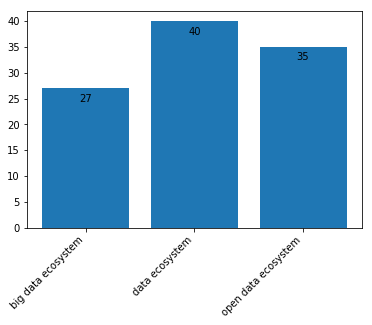

In [5]:
# Show the occurrences of each of the search terms
search_terms = summary['search terms']

labels = list(search_terms.keys())
values = list(search_terms.values())

fig = plt.bar(range(len(values)), values, align='center')
autolabel(fig, -3)
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.show()